In [18]:
# hubble parameter?
# units of all the quantities?

In [1]:
import numpy as np
from bbh.sim import GadgetSnapshot, ParticleType
import astropy.units as u

In [2]:
ic = GadgetSnapshot()

### Let's sort out the header portion of the IC

In [3]:
# Define number of particles of each type.
# INDEX [0]:Gas   [1]:Halo   [2]:Disk   [3]:Buldge   [4]:Stars   [5]:Boundary

num       = 2**16           # Number of particles currently generated.
dm_mass   = (6079.8692/num) #*u.solMass
imbh_mass = 1e4             #*u.solMass

# Ensure constants are 100% up-to-date:
# https://en.wikipedia.org/wiki/Lambda-CDM_model#Parameters
omega_0      = 0.3089 # 0.3089±0.0062
omega_lambda = 0.6911 # 0.6911±0.0062
hubble_param = 0.6774 # 67.74±0.46 km s−1 Mpc−1

ic.header.Massarr = (0,dm_mass,0,0,imbh_mass,0)
ic.header.Omega0      = omega_0
ic.header.OmegaLambda = omega_lambda
ic.header.HubbleParam = hubble_param

### Now we populate our IC with particles and the IMBH:

In [7]:
# ic.add(particle_type, position, velocity, mass)
with open("..//..//data//snapshots//saved//positions.npy", 'rb') as f:
    positions  = np.load(f)
with open("..//..//data//snapshots//saved//velocities.npy", 'rb') as f:
    velocities = np.load(f)

In [20]:
positions # In [Parsecs]

array([[-0.19191732, -0.92296986,  0.11414873],
       [ 0.49545703, -0.20436927, -0.1922574 ],
       [ 0.51014729,  0.10137424, -0.51052085],
       ...,
       [ 0.01774544, -0.01409899, -0.05092147],
       [ 0.05664311, -0.02157874, -0.01735193],
       [-0.43513379, -0.19904861, -0.05786332]])

In [21]:
velocities # In [Parsecs/Second]

array([[-7.46445776e-14,  8.55477371e-14, -9.98272493e-14],
       [-1.89376089e-13, -2.10297026e-13, -1.61813511e-13],
       [-1.53338991e-13, -6.16262379e-14,  2.13677882e-13],
       ...,
       [-9.18873594e-13, -1.78495372e-13, -1.41581855e-13],
       [-2.56031688e-13, -2.34134404e-13, -5.73842086e-13],
       [-1.14934675e-13,  3.83694119e-14, -8.73479766e-14]])

In [8]:
# Let's add in the dark matter halo particles first.
for dm_particle in range(num):
    ic.add(ParticleType.Halo,positions[dm_particle],velocities[dm_particle])

In [9]:
ic.add(ParticleType.Stars,np.zeros(3),np.zeros(3))

range(65536, 65537)

In [10]:
# ic.header.Nall  = (0,num,0,0,1,0)
# ic.header.Npart = (0,num,0,0,1,0)
# ic.header.NumFiles = (0)

In [11]:
print(ic.header)

GADGET HEADER
Npart:             array([    0, 65536,     0,     0,     1,     0], dtype=int64)
Massarr:           (0, 0.09277144165039063, 0, 0, 10000.0, 0)
Time:              0
Redshift:          0
FlagSfr:           0
FlagFeedback:      0
Nall:              array([    0, 65536,     0,     0,     1,     0], dtype=int64)
FlagCooling:       0
NumFiles:          0
BoxSize:           0
Omega0:            0.3089
OmegaLambda:       0.6911
HubbleParam:       0.6774
FlagAge:           0
FlagMetals:        0
NallHW:            0
flag_entr_ics:     0



In [12]:
with open("..//..//data//snapshots//saved//galaxy_littleendian_modified.dat","wb") as binary_file:
    binary_file.write(ic.pack())

# Okay, let's try reading back in what we just saved!

In [13]:
with open("..//..//data//snapshots//saved//galaxy_littleendian_modified.dat", "rb") as binary_file:
    data = binary_file.read()
snapshot = GadgetSnapshot()
snapshot.parse(data)

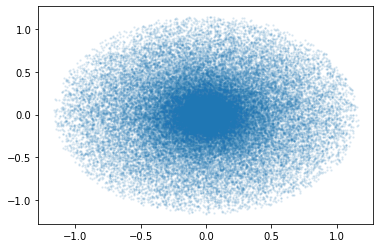

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*snapshot.pos.T[:2], alpha=0.1, s=2)

In [17]:
snapshot.header.Npart

(0, 65536, 0, 0, 1, 0)